# Teoría Regresión Logística (en edicion)

Es un modelo de clasificación de machine learning los cuales comprende: __Regresión Logística Binaria__, __Ordenada__ y __Multinomial__. 

Todas comparten la sigueinte función de enlace __logit__.
$$ log_{e}\left ( \frac{p}{1-p} \right )$$

donde __p__ es alguna probabilidad.

Para la regresión logistica binaria y multinomial, se podría escribir las probabilidades como:
$$ log_{e}\left ( \frac{P(Y=j|X)}{P(Y=M + 1|X)} \right )$$
para __j__ en 1,.....,__M__. 

Donde __M__ + 1 corresponde a los niveles discretos del ejercicio. 

En el caso __binario__, hay 2 niveles (__M__ = 1 y __M__=2).

Sabemos muy bien que la suma de las probabilidades debe ser 1.

$$ \sum_{j=1}^{M+1}P(Y=j|X)=1$$

Por tanto, la expresión __logit__ para resultados binarios se simplifica.
$$log_{e}\left ( \frac{P(Y=1|X)}{1-P(Y=1|X)} \right )$$

Para la regresión logistica __ordenada__, es estandar utilizar un __logit acumulativo__, que tiene la siguiente forma:

$$log_{e}\left ( \frac{P(Y \leq j|X)}{1-P(Y\leq j|X)} \right )$$

La relación de probabilidades se conoce como __ODDS__:
$$Odds = \left ( \frac{P(Y =1|X)}{1-P(Y=1|X)} \right )$$

Por ejemplo, con $P(Y=1|X)=0.75$, se tiene lo siguiente:
$$Odds = \frac{0.75}{1-0.75} =\frac{0.75}{0.25}= 3$$
La interpretación sería: "Se espera que tenga 3 veces más de probabilidades de tener el evento (__Y=1__), que no tener el evento (__Y=0__). 

El __logit__ es el algoritmo de las probabilidades.

Los coeficientes de la regresión se basan en las probabilidades. 

Tomando el caso más simple; un modelo con un solo predictor $x_{1}$:

$$ log_{e}\left ( \frac{P(Y_{i}=1|X=x_{1i})}{1-P(Y_{i}=1|X =x_{1i})} \right )= \beta_{0}+ \beta_{1}*x_{1i}$$

El coeficiente $\beta_{1}$, se define: 
$$ \beta _{1}=log_{e}\left ( \frac{P(Y_{i}=1|X=x_{1i}+1)}{P(Y_{i}=1|X =x_{1i})} \right )= \beta_{0}+ \beta_{1}*x_{1i}$$

Es una practica comun reportar las __razones de probabilidades__ en lugar de las __razones de probabilidades logaritmicas__, lo cual se logra exponenciando los coeficientes.

$$ OddsRatio = OR = e ^{\beta _{1}} $$


Suponiendo que $\beta_{1}$ = 0.5, entonces $e ^{0.5}$=1.65; se interpretaria como una indicación de que un cambio en un unidad en $x_{1}$, se asoció con __1.65 veces__ la probabilidad de obtener el evento.

A diferencia de las probabilidades (que tienen una interpretacion bastante natural), los coeficientes de probabilidades son un poco más dificiles de interpretar, ya que representan un __cambio multiplicativo en las probabilidades__, pero no indican cuales eran las probabilidades.

A continuación se observa un grafico con datos de una variable binaria.

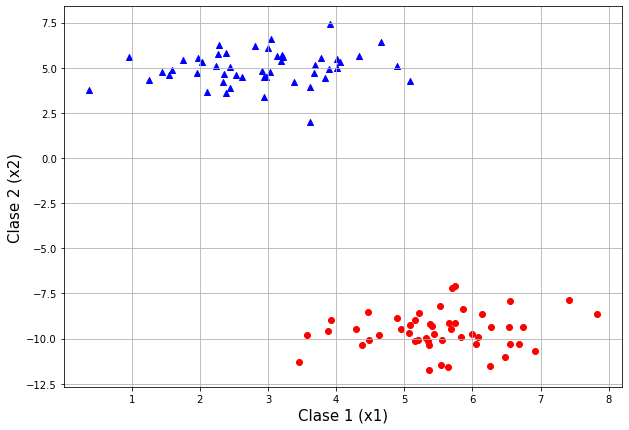

In [49]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# ! Definición de variables
X,y = make_blobs(n_samples=100,n_features=2,centers=2,random_state=10)

# Dimensión del grafico
plt.figure(figsize=(10,7))
for target, color, maker in zip(range(2),['red','blue'],['o','^']):
 plt.scatter(X[y== target,0],X[y==target,1],c=color,marker=maker,label='clase'+format(target))

plt.xlabel('Clase 1 (x1)', fontsize=15); plt.ylabel('Clase 2 (x2)',fontsize=15)
plt.grid()
plt.show()

Mientras en la regresión lineal predice los valores __y__, usando el modelo de regrsión, en regresión logística proporciona una etiqueta de clase.
En referencia al gráfico, la clasificación binaria debe devolver clase 1 (puntos rojos) o clase 2 (triangulos azules).
Para convertir los valores __y__ lineales a binarios, la regresión logística usa alguna función __tipo sigmoidal__.

## Función sigmoidal

Muchos procesos naturales muestran una progresión temporal desde niveles bajos al inicio hasta acercarse a un punto máximo en un cierto tiempo dado; esta transición se produce en una región caracterizada por una fuerte acelaración intermedia. 

La función __sigmoide__ permite describir esta evolución.

__Formula__
$$P(t)=\frac{1}{1+e^{-t}}$$

En muchas aplicaciones, la velocidad de cambio de una variable es proporcional al valor de __y__. Cuando __y__ es una función del tiempo.

__Representación Gráfica de la función Sigmoide__

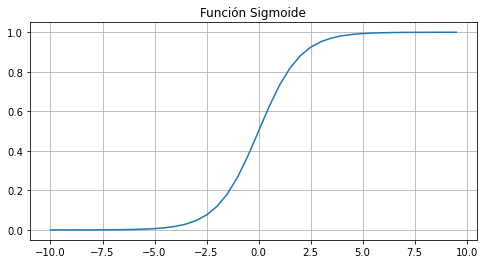

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Definción de la función
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Definición de variable
t = np.arange(-10,10,0.5)
y = sigmoid(t)
plt.figure(figsize=(8,4))
plt.plot(t,y); plt.grid();plt.title("Función Sigmoide") 
plt.show()

_Ejemplo_:
Un cultivo de bacterias está creciendo de acuerdo a la __función de crecimiento logístico__: $$y=\frac{1.25}{1+0.25e^{-0.4t}}$$, con $t\geq 0$.

Donde __y__ es el peso del cultivo en gramos y __t__ es el tiempo en horas.
Encuentre el peso del cultivo despues de:
-  1 hora
-  10 horas

Reemplazando en la formula se obtiene que el peso despues de 1 hora en el cultivo es de aproximadamente 1.071 gramos y en 10 horas 1.244 gramos.

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# ! Definición de función sigmoidal
def sigmoid(x):
    return 1.25/(1+0.25*np.exp(-0.4*x))

sigmoid(1)
# sigmoid(10)

1.0705904414932348